In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [5]:
import os

project_path = "/content/drive/MyDrive/Dextro_Project"
os.chdir(project_path)
print("Working Directory:", os.getcwd())


Working Directory: /content/drive/MyDrive/Dextro_Project


In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models


DATASET_DIR = "dataset"


IMG_SIZE = 128


CATEGORIES = ["Normal", "Dextrocardia"]


X = []
y = []

for label, category in enumerate(CATEGORIES):
    folder = os.path.join(DATASET_DIR, category)
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        try:
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(label)
        except Exception as e:
            print("Error loading image:", e)

X = np.array(X) / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

print("Dataset Loaded!")
print("X shape:", X.shape)
print("y shape:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)


Error loading image: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dataset Loaded!
X shape: (11, 128, 128, 1)
y shape: (11,)
Training set: (8, 128, 128, 1)
Testing set: (3, 128, 128, 1)


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

print("Data loaded for training!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes
])


Data loaded for training!
X_train shape: (8, 128, 128, 1)
y_train shape: (8, 2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.7016 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8750 - loss: 0.4209 - val_accuracy: 1.0000 - val_loss: 0.0266
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8750 - loss: 0.4301 - val_accuracy: 1.0000 - val_loss: 0.1025
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step - accuracy: 0.8750 - loss: 0.4271 - val_accuracy: 1.0000 - val_loss: 0.2768
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step - accuracy: 0.8750 - loss: 0.4222 - val_accuracy: 1.0000 - val_loss: 0.2479
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 0.8750 - loss: 0.3779 - val_accuracy: 1.0000 - val_loss: 0.1309
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.8750 - loss: 0.3623 - val_accuracy: 1.0000 - val_loss: 0.0539
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.8750 - loss: 0.3329 - val_accuracy: 1.0000 - val_loss: 0.

In [10]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [11]:
model.save("dextro_model.h5")


Saving download.jpeg to download (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


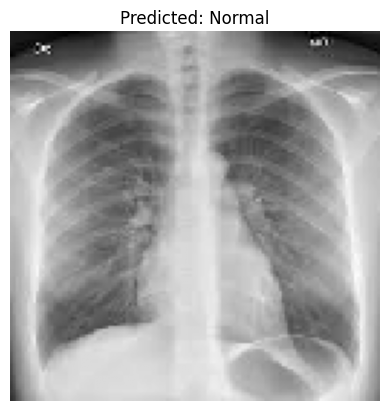

Prediction: Normal


In [13]:
from google.colab import files
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = load_model("dextro_model.h5")


uploaded = files.upload()


for fn in uploaded.keys():
    img_path = fn


def test_on_image(img_path):
    img = image.load_img(img_path, target_size=(128,128), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    label = "Dextrocardia" if np.argmax(pred) == 1 else "Normal"


    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {label}")
    plt.axis("off")
    plt.show()

    return label


result = test_on_image(img_path)
print("Prediction:", result)
